In [12]:
#Importation des library
from pylab import *
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from scipy import linalg as LA
import pandas as pd
import numpy as np
import csv
import statistics
import sklearn
from matplotlib.pyplot import figure
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import itertools

In [13]:
#Importation du fichier de données
data= pd.read_csv("Live_20210128.csv", sep=",")

# 2.2 Preliminary analysis : descriptive statistics

### 1. How many observations are there ? How many variables ?

In [14]:
print("Ce dataframe comporte " + str(shape(data)[0]) + " individus et " + str(shape(data)[1]) + " variables.")

Ce dataframe comporte 7050 individus et 16 variables.


### 2. Are there any missing values in the dataset ? If you think it is appropriate, delete the variables concerning missing values.


<AxesSubplot: xlabel='index'>

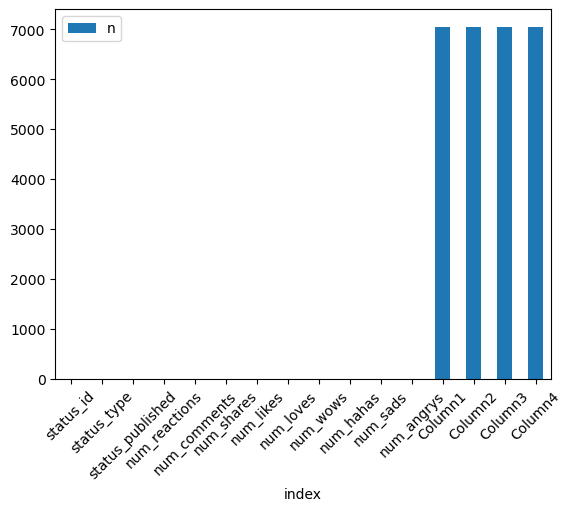

In [15]:
data.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45)

In [16]:
data = data.iloc[:,0:12]
keys = data.keys()
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


### 3. Calculate descriptive statistics for all the variables except status_type and status_published. You can use graphics of your choice to help you describe the data (boxplot, scatter plot, etc.). Interpret the results.

       num_reactions  num_comments   num_shares    num_likes    num_loves  \
count    7050.000000   7050.000000  7050.000000  7050.000000  7050.000000   
mean      230.117163    224.356028    40.022553   215.043121    12.728652   
std       462.625309    889.636820   131.599965   449.472357    39.972930   
min         0.000000      0.000000     0.000000     0.000000     0.000000   
25%        17.000000      0.000000     0.000000    17.000000     0.000000   
50%        59.500000      4.000000     0.000000    58.000000     0.000000   
75%       219.000000     23.000000     4.000000   184.750000     3.000000   
max      4710.000000  20990.000000  3424.000000  4710.000000   657.000000   

          num_wows    num_hahas     num_sads   num_angrys  
count  7050.000000  7050.000000  7050.000000  7050.000000  
mean      1.289362     0.696454     0.243688     0.113191  
std       8.719650     3.957183     1.597156     0.726812  
min       0.000000     0.000000     0.000000     0.000000  
25%   

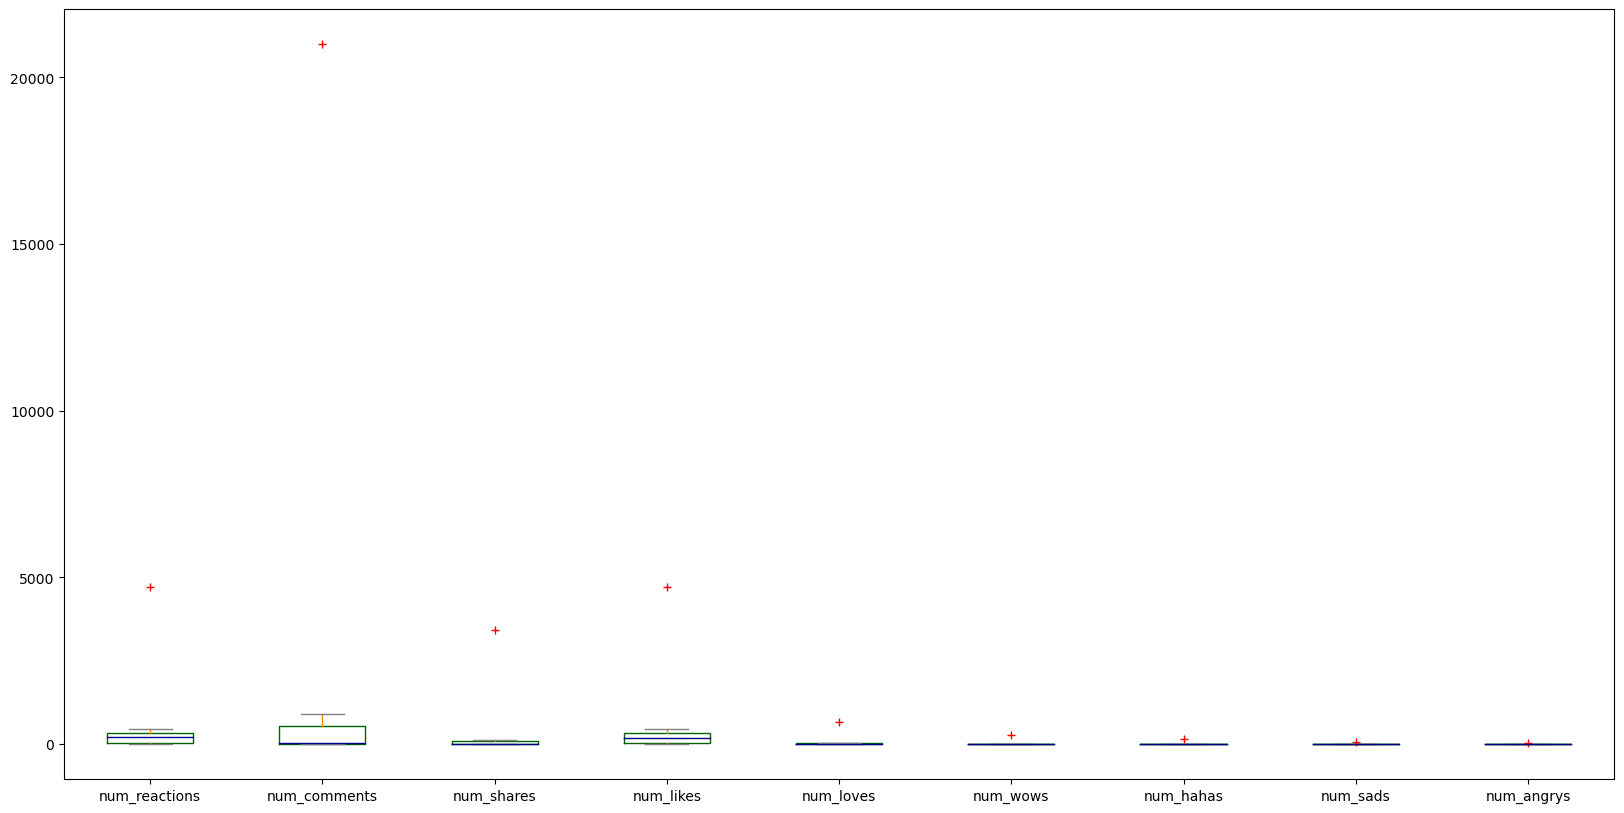

In [61]:
summary = data.iloc[:,2:len(keys)].describe()

color = {
    "boxes": "DarkGreen",
    "whiskers": "DarkOrange",
    "medians": "DarkBlue",
    "caps": "Gray",
}

summary.iloc[1:8].plot.box(color=color, sym="r+", figsize=(20,10))
print(summary)

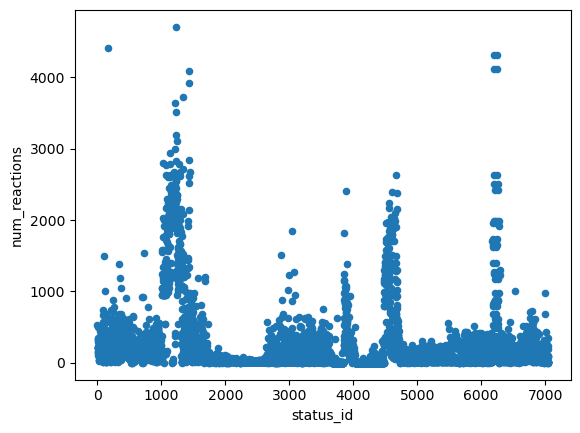

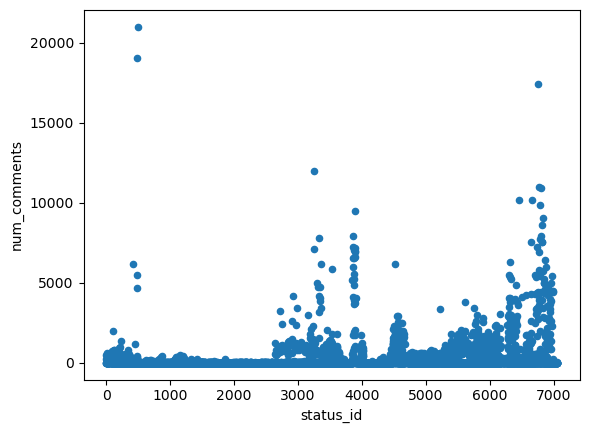

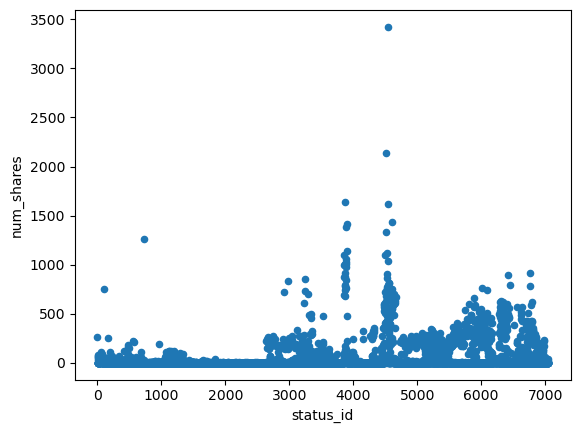

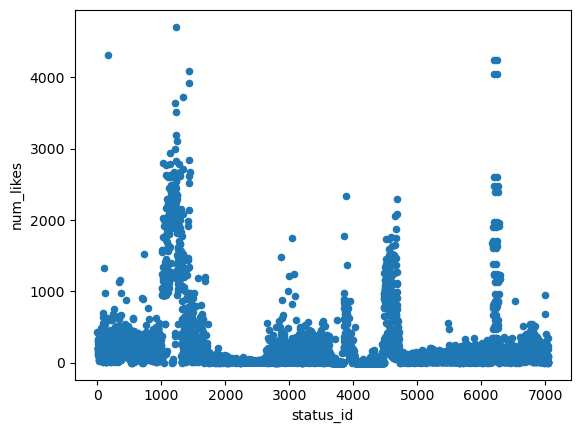

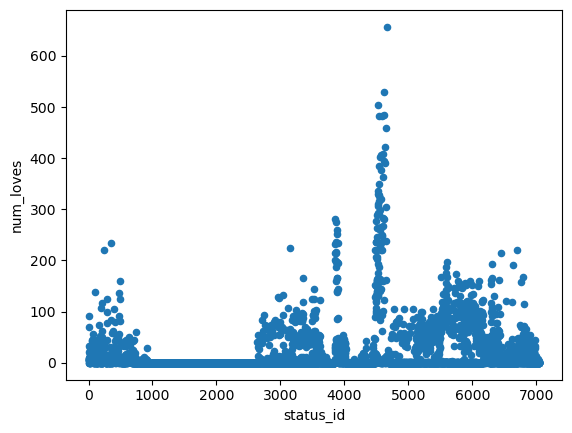

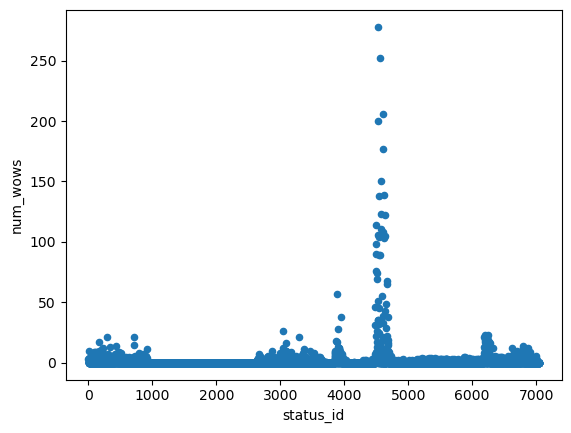

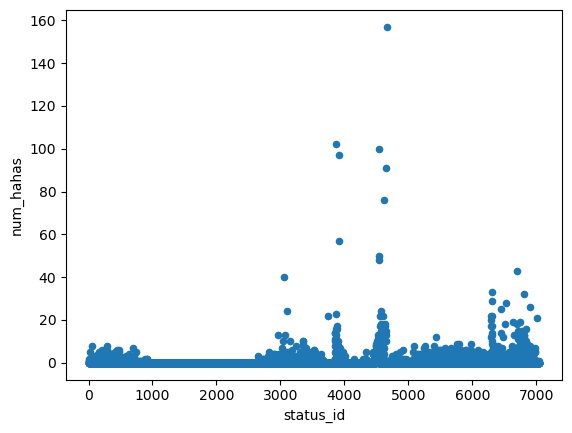

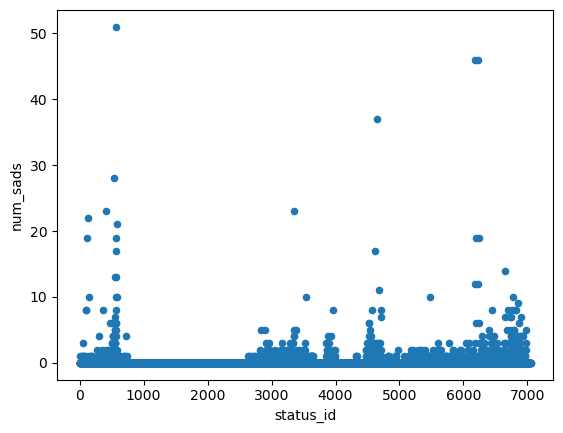

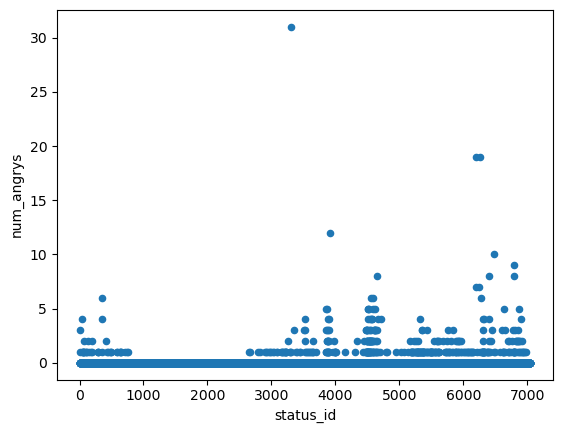

In [62]:
for i in keys[3:len(keys)]:
    data.plot.scatter(x="status_id", y=i)

# 2.3 Principal Component Analysis (PCA)

## Theoretical question

### 1. If two variables are perfectly correlated in the dataset, would it be suitable to include both of them in the analysis when performing PCA ? Justify your answer.

Dans le cas ou deux variables sont corrélées, il n'est pas nécéssaire de les retirer de la PCA, car celles-ci auront la même variable représentative. L'objectif de la PCA est de simplifier la complexité des données en réduisant les dimensions du dataframe. Les deux variables seront par la suite regroupées par la PCA tout en expliquant la variablilité du dataset original.

### 2. In contrast, what if the variables are completely uncorrelated ?

L'objectif étant de réduire les dimensions du dataframe, perdre de l'information avant d'effectuer la PCA incluerais un biais dans les résultats.

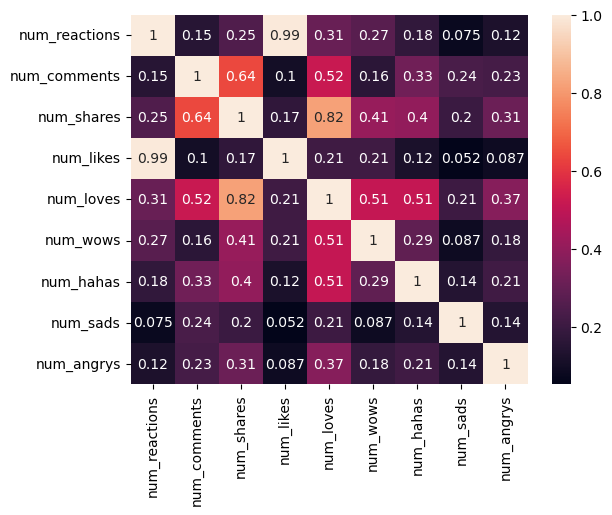

In [71]:
corrdata = data.iloc[:,3:len(keys)].corr()
sn.heatmap(corrdata, annot=True)
plt.show()

## Practical application

In [72]:
#Transformation du dataframe au format numpy
dx = np.array(data[["num_comments", "num_shares", "num_likes", "num_loves"]])
print(dx)

[[512 262 432  92]
 [  0   0 150   0]
 [236  57 204  21]
 ...
 [  0   0   1   1]
 [ 12  22 349   2]
 [  0   0  17   0]]


### 1. Calculate the variance of each variable and interpret the results. Do you think it is necessary to standardize the variables before performing PCA for this dataset ? Why ?


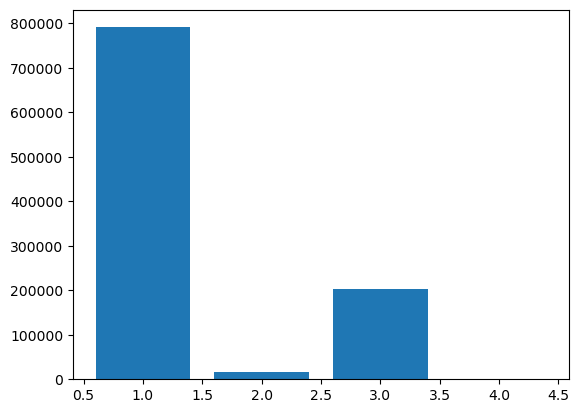

In [81]:
plt.bar([1,2,3,4],np.var(dx, axis = 0))
plt.show()

#différence d'unité donc centrer réduire

### 2. Perform PCA using the appropriate function with the appropriate arguments and options considering your answer to the previous question. Analyze the output of the function. Interpret the values of the two first principal component loading vectors.

In [82]:
#Centre de gravité
G = np.mean(dx, axis=0)
G

array([224.35602837,  40.02255319, 215.04312057,  12.72865248])

In [83]:
#Matrice centré
Y = dx-G
Y

array([[ 287.64397163,  221.97744681,  216.95687943,   79.27134752],
       [-224.35602837,  -40.02255319,  -65.04312057,  -12.72865248],
       [  11.64397163,   16.97744681,  -11.04312057,    8.27134752],
       ...,
       [-224.35602837,  -40.02255319, -214.04312057,  -11.72865248],
       [-212.35602837,  -18.02255319,  133.95687943,  -10.72865248],
       [-224.35602837,  -40.02255319, -198.04312057,  -12.72865248]])

In [84]:
#Matrice centré réduite
SD=Y/np.sqrt(np.var(dx, axis = 0))
SD

array([[ 0.32335035,  1.6868788 ,  0.48272661,  1.98326643],
       [-0.25220622, -0.3041444 , -0.14472021, -0.3184544 ],
       [ 0.01308938,  0.12901714, -0.02457082,  0.2069384 ],
       ...,
       [-0.25220622, -0.3041444 , -0.47624353, -0.29343569],
       [-0.23871662, -0.13695924,  0.29805255, -0.26841699],
       [-0.25220622, -0.3041444 , -0.44064371, -0.3184544 ]])

In [87]:
#Matrice covariance variance
V=(np.dot(SD.T,SD)/(dx.shape[0]-1))
V

array([[1.00014186, 0.64072829, 0.10170146, 0.52129743],
       [0.64072829, 1.00014186, 0.1725164 , 0.82011657],
       [0.10170146, 0.1725164 , 1.00014186, 0.20933778],
       [0.52129743, 0.82011657, 0.20933778, 1.00014186]])

In [88]:
#Valeurs/Vecteurs propres
eigval=LA.eig(V)
#Valeur propre corrigé
n=dx.shape[0]
val_pro=((n-1)/n)*eigval[0]

#Vecteurs propres qui sont associé aux valeurs propres les plus importantes 
vect_pro_princ=eigval[1][0:2]

vect_pro_princ

array([[ 0.5109239 ,  0.21125755,  0.81126761,  0.19018906],
       [ 0.60321933,  0.11150515, -0.23195788, -0.75490965]])

### 3. Calculate the percentage of variance explained (PVE) by each component ? Plot the PVE explained by each component, as well as the cumulative PVE. How many components would you keep ? Why ?


In [89]:
#Pourcentage de la contribution des valeurs propres
contrib=[]
cnt=0
for i in range(len(val_pro)):
    cnt=(val_pro[i]/sum(val_pro))*100
    contrib.append(np.round(cnt,3))
contrib

[(59.668+0j), (23.776+0j), (12.483+0j), (4.073+0j)]

d:\anaconda\envs\crypto-bot\lib\site-packages\matplotlib\transforms.py:762: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


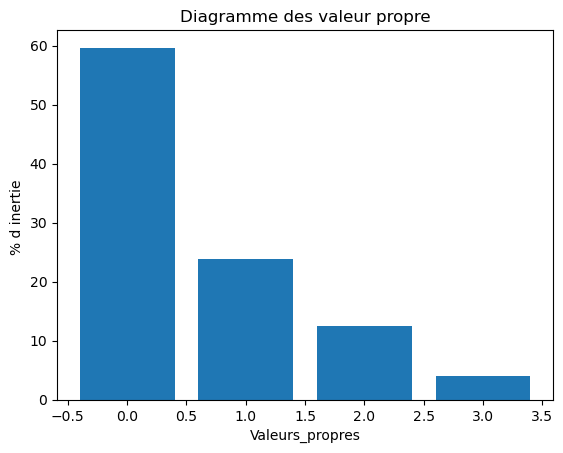

In [90]:
#Diagramme valeurs propres
x_diag=[]
for i in range(len(val_pro)):
    x_diag.append(i)


plt.bar(x_diag, contrib)
plt.title('Diagramme des valeur propre')
plt.xlabel("Valeurs_propres")
plt.ylabel("% d inertie ")
plt.show()

### 4. Use a biplot with a correlation circle to display both the principal component scores and the loading vectors in a single plot. Interpret the results.

In [91]:
#Calcul des projetés
proj=np.dot(SD,eigval[1])
proj

array([[ 2.4273764 , -0.14773195, -1.09640298,  0.02014545],
       [-0.52560545,  0.04292485,  0.01237579, -0.01456504],
       [ 0.19940004,  0.04771207, -0.1301863 ,  0.03547802],
       ...,
       [-0.57738604,  0.36548237, -0.04458121,  0.00920389],
       [-0.30039669, -0.36367388,  0.01720923, -0.11761563],
       [-0.58475391,  0.3301207 , -0.02685082, -0.00735458]])

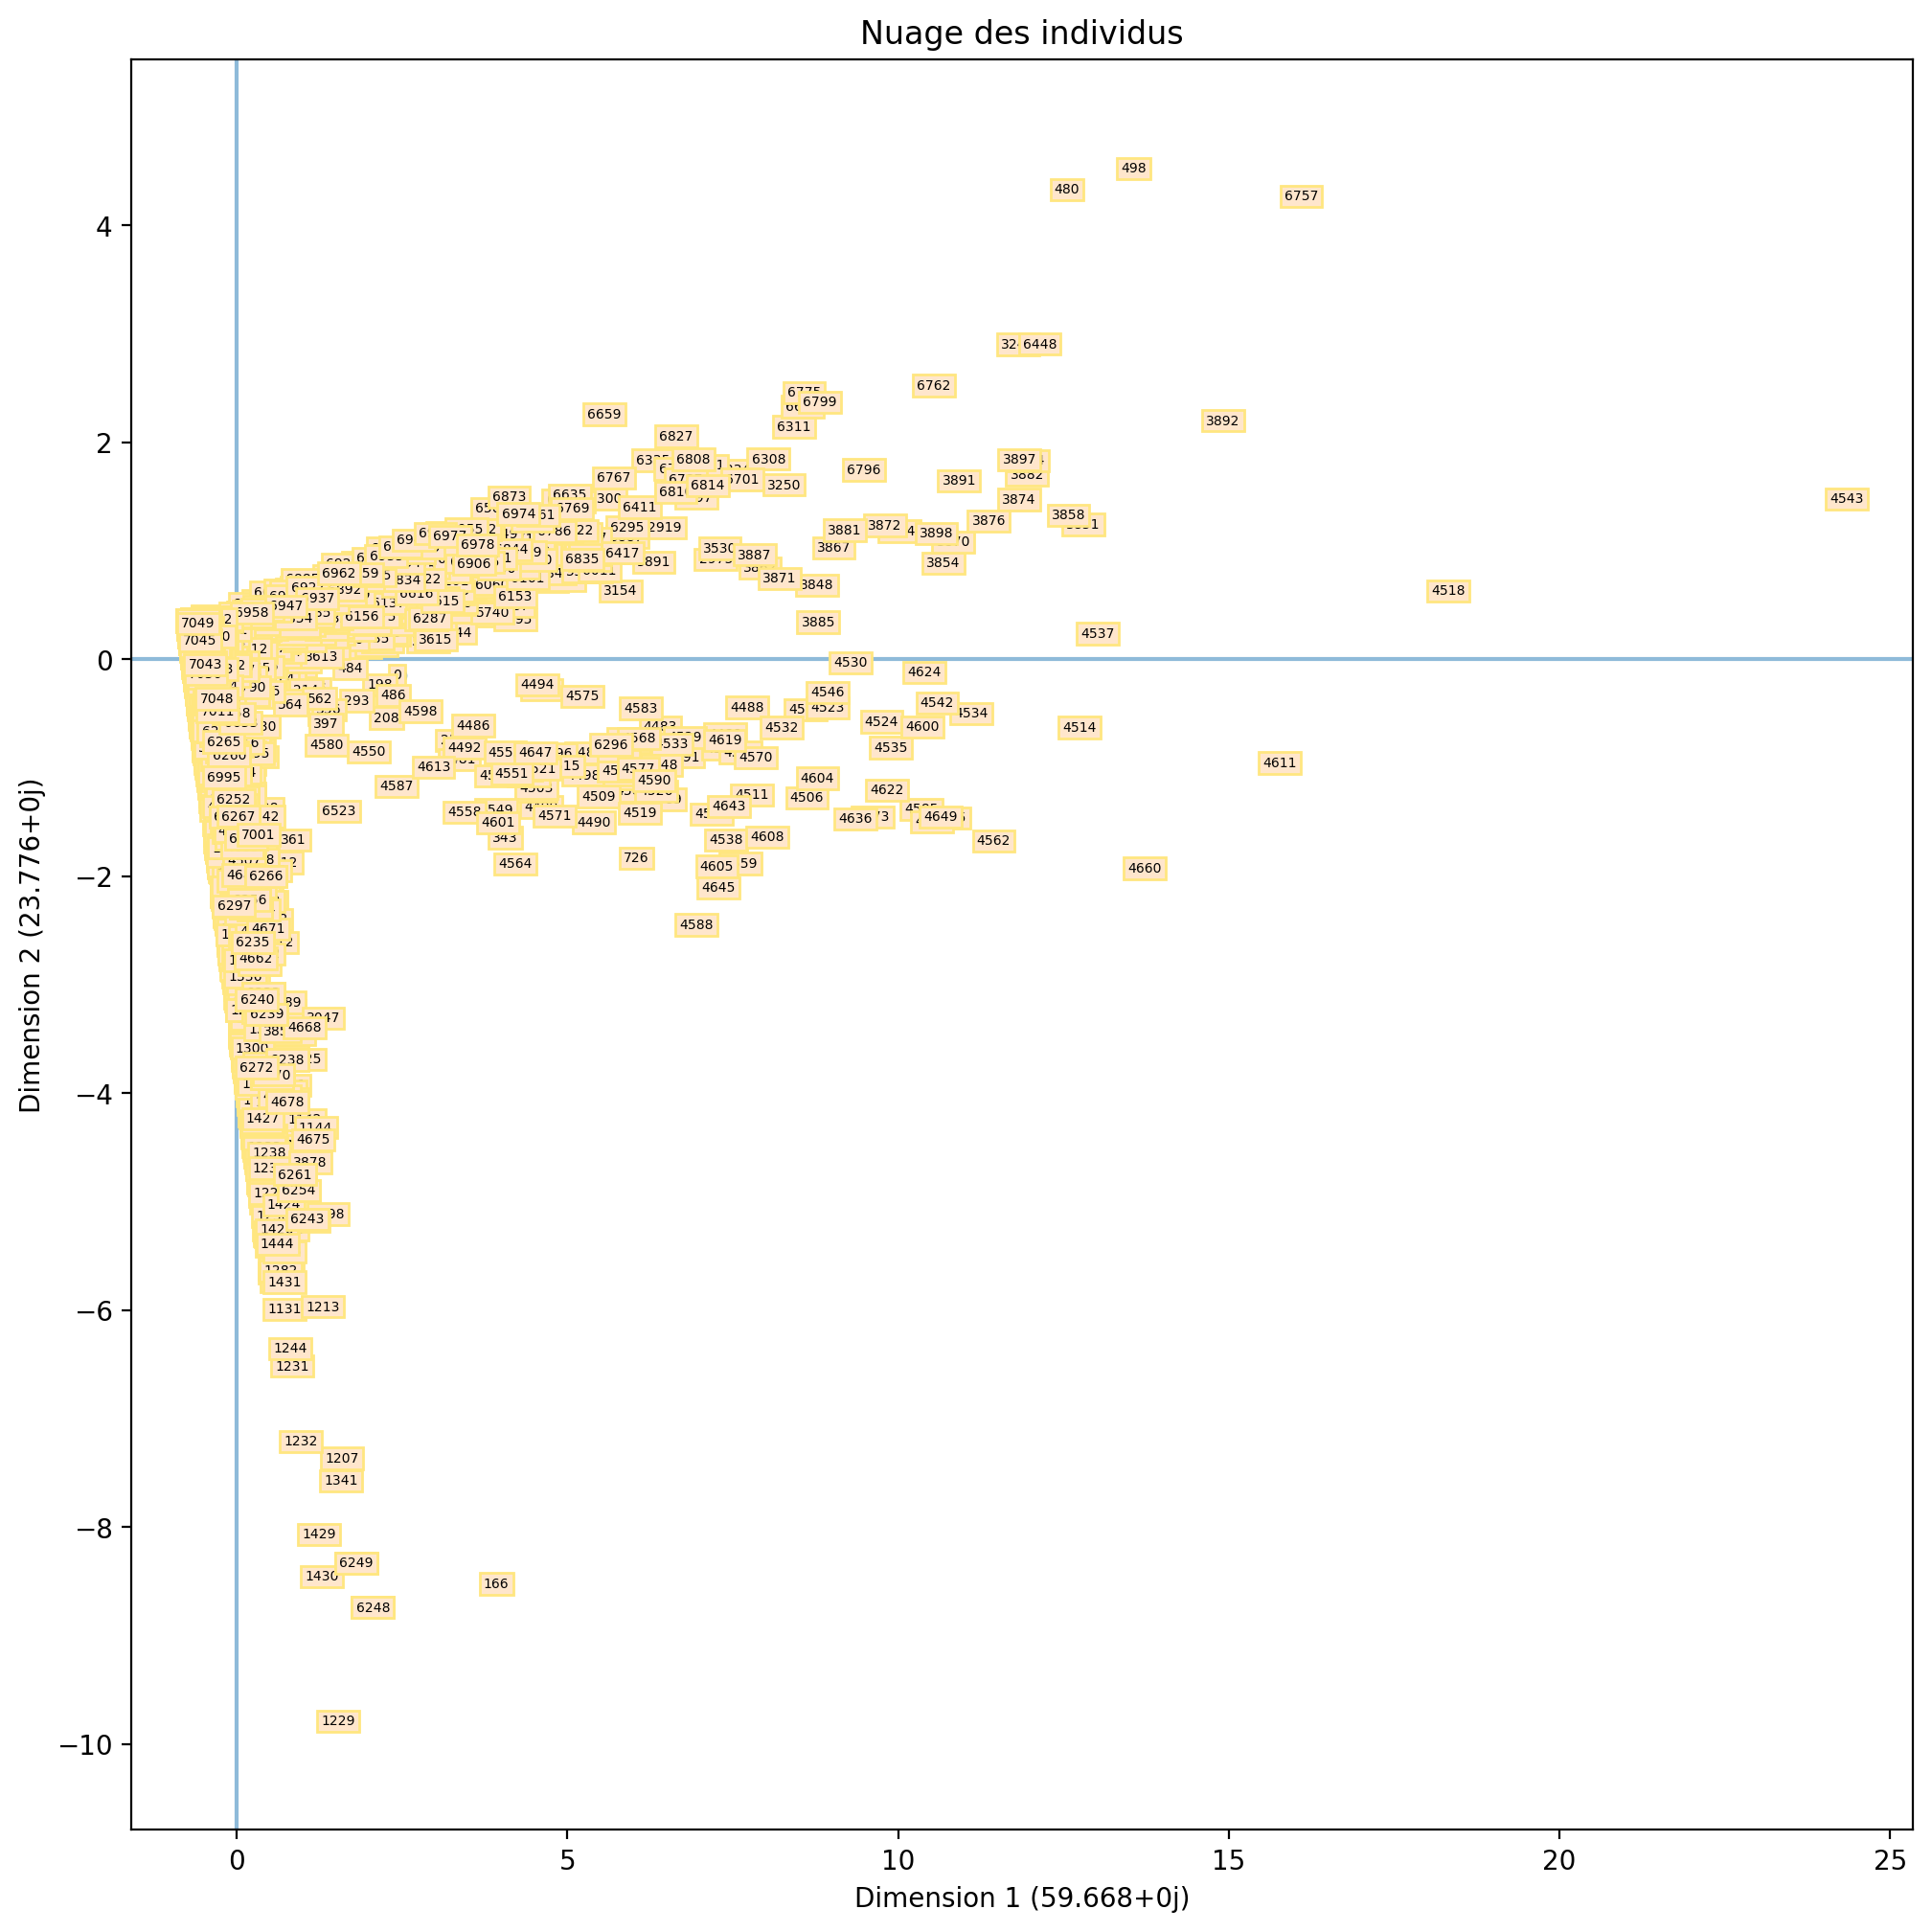

In [92]:
"""#Representation des individus

figure(figsize=(12.0, 12.0), dpi=200)
plt.title('Nuage des individus')
plt.scatter(proj[:,0],proj[:,1])
plt.xlim((min(proj[:,0]))-1,(max(proj[:,0])+1))
plt.ylim((min(proj[:,1]))-1,(max(proj[:,1])+1))
plt.axvline(0, alpha=0.5)
plt.axhline(0, alpha=0.5)
plt.xlabel("Dimension 1 "+(str(contrib[0])))
plt.ylabel("Dimension 2 "+(str(contrib[1])))
for i in range(dx.shape[0]):
    plt.annotate(i,(proj[:,0][i], proj[:,1][i]), size=5,
         ha="center", va="center",
             bbox=dict(boxstyle="square",
                   ec=(1., 0.9, 0.5),
                   fc=(1., 0.9, 0.8)
                   )
         )
    
plt.show() """

In [93]:
#Coordonnées x,y du cercles des corrélations

corX=[]
for i in range(dx.shape[1]):
    corX.append(pearsonr(proj[:,0],dx[:,i]))

corY=[]
for i in range(dx.shape[1]):
    corY.append(pearsonr(proj[:,1],dx[:,i]))

cor_x=[]
for i in range(len(corX)):
    cor_x.append(corX[i][0])

cor_y=[]
for i in range(len(corY)):
    cor_y.append(corY[i][0])


In [94]:
#Qualité de la representation sur les deux axes

Qx=[]
for i in range(dx.shape[0]):
    Qx.append((np.dot(np.transpose(vect_pro_princ[0]),SD[i])*np.dot(np.transpose(SD[i]),vect_pro_princ[0]))/dx.shape[0])

Qy=[]
for i in range(dx.shape[0]):
    Qy.append((np.dot(np.transpose(vect_pro_princ[1]),SD[i])*np.dot(np.transpose(SD[i]),vect_pro_princ[1]))/dx.shape[0])


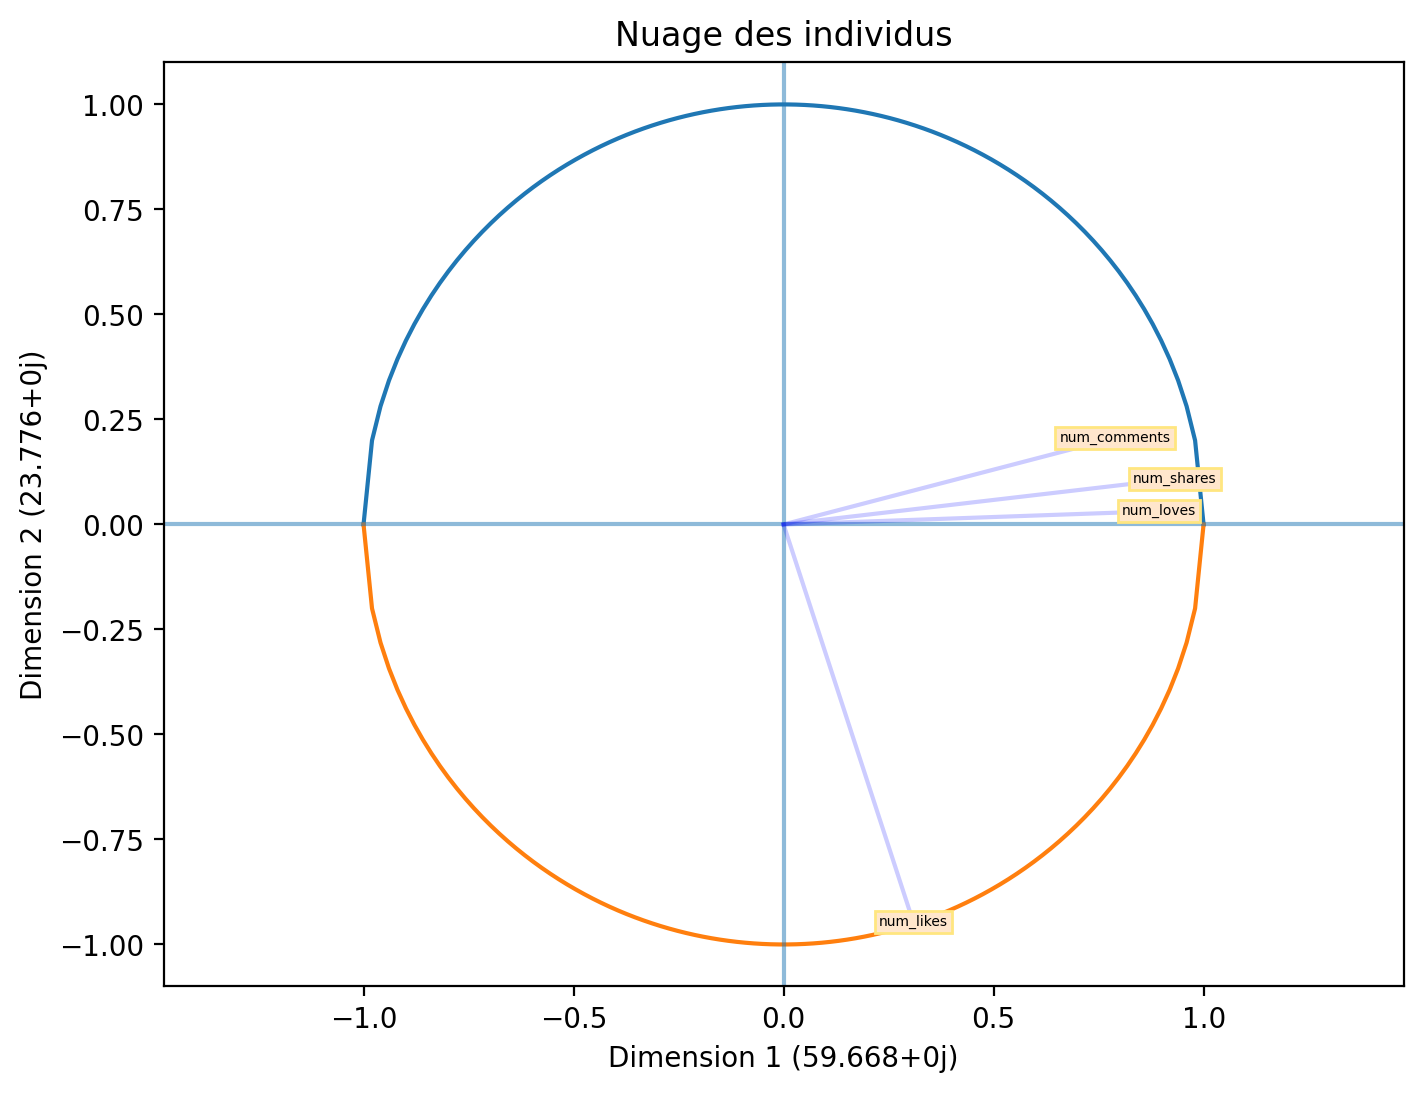

In [96]:
#Cercle des correlation
varname = ["num_comments", "num_shares", "num_likes", "num_loves"]
figure(figsize=(8, 6), dpi=200)
x=linspace(-1,1,100)
y=sqrt(1-x**2)
plot(x,y)
plot(x,-y)
plt.title('Nuage des individus')
plt.axvline(0,alpha=0.5)
plt.axhline(0,alpha=0.5)
plt.scatter(cor_x,cor_y)
plt.xlabel("Dimension 1 "+(str(contrib[0])))
plt.ylabel("Dimension 2 "+(str(contrib[1])))
axis('equal')
for i in range(dx.shape[1]):
    plt.plot([0,cor_x[i]],[0,cor_y[i]],color = 'blue',alpha = 0.2)
    plt.text(cor_x[i], cor_y[i], varname[i], size=5,
         ha="center", va="center",
            bbox=dict(boxstyle="square",
                   ec=(1., 0.9, 0.5),
                   fc=(1., 0.9, 0.8)
                   )
         
         )

show()

# 2.4 Linear Regression

## theoretical question :

### Let us suppose that we fit a linear regression model to explain Y as a linear function of two variables X1 and X2. Let us denote R2 the associated coefficient of determination. Interpret R2 What is the range of values that can be taken by R2 ? If we denote r1 and r2 the coefficient of correlation between X1 and Y and the coefficient of correlation between X2 and Y respectively. What is the relationship between R2 and r1 and r2 ?

R2 est un indice la qualité de la prédiction de la régression linéaire. Il correspond au coefficient de détermination entre la variable X et la target Y, il prend ses valeurs entre 0 et 1 (plus on est proche de 1, plus la régression linéaire est adéquate). R2 représente dans le cas d'une régression linéaire la somme des carré de r1 et r2.

## Practical application


### Perform an initial analysis of the variable num_shares based on the others by calculating the correlation coefficient between num_shares and each of the other variables except status_type, status_published and num_reactions. Which one is the most correlated with num_shares ?


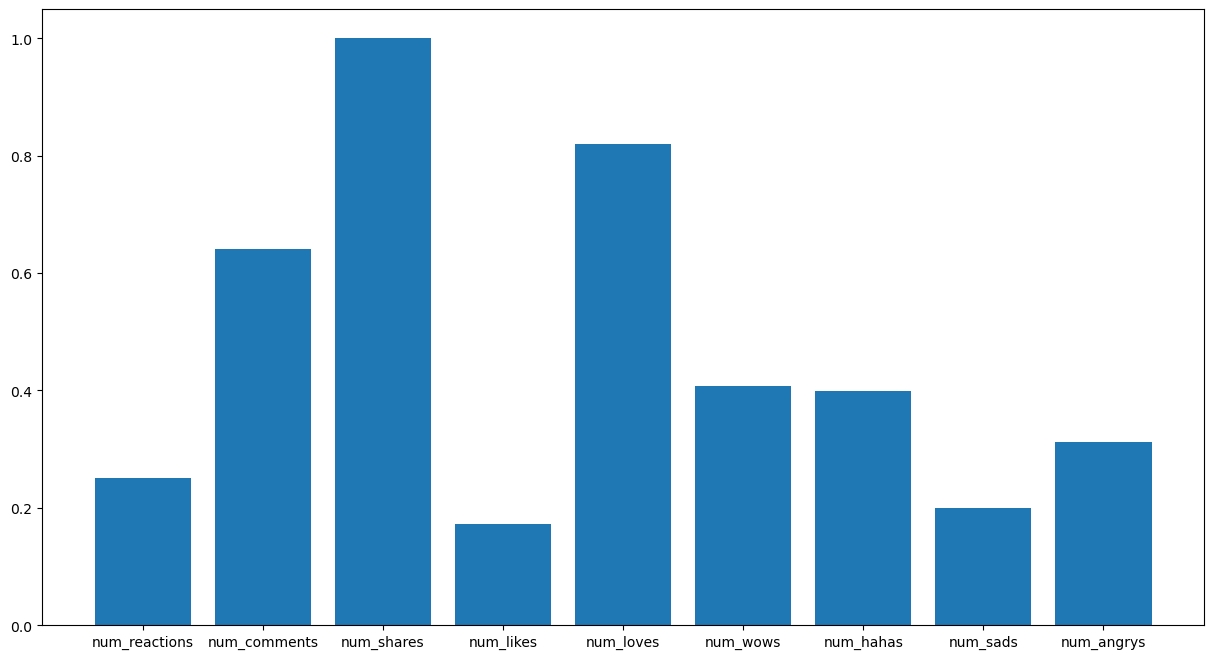

In [119]:
x = corrdata['num_shares']
y = list(corrdata['num_shares'].index)

plt.figure(figsize=(15,8))
plt.bar(y,x)
plt.show()

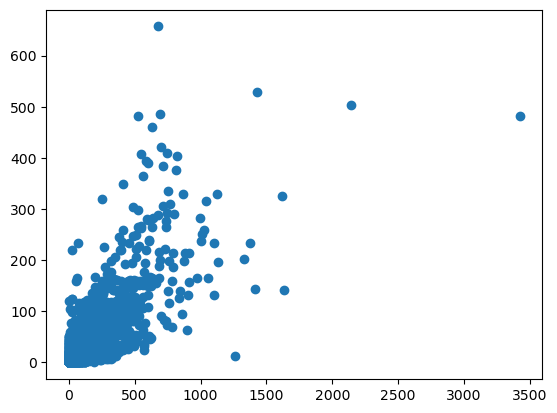

In [149]:
plt.scatter(data['num_shares'], data['num_loves'])
plt.show()

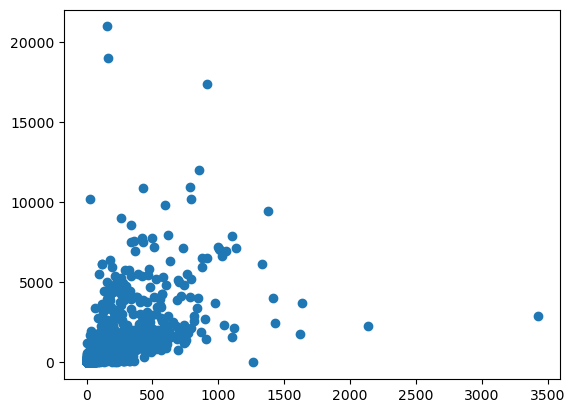

In [150]:
plt.scatter(data['num_shares'], data['num_comments'])
plt.show()

### Fit a simple linear regression model using as target variable num_shares, denoted Y , and as feature variable the most correlated variable to it that you identified in the previous question, denoted X :
                                                                Y = β0 + β1X + e
<br>
Then, answer the following questions :
<ol>
<li>What are the coefficient estimates ? Interpret coefficient estimate βˆ1.</li><br>
<li>Give the general expression of a 1 − α confidence interval for the parameter β1. Calculate the 95% confidence interval for this coefficient. Interpret the results.</li><br>
<li>Elaborate the zero slope hypothesis test for coefficient β1 and conclude if there is an impact of the predictor on the number of shares. Is β1 significantly non zero ?</li><br>
<li>What is the value of the coefficient of determination R2 ? Interpret this result. Is this model suitable to predict the number of shares ?</li>
</ol>

In [46]:
Y = np.array(data['num_shares'])
X = np.array(data['num_loves']).reshape(-1,1)

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

reg = LinearRegression().fit(X_train, y_train)

coefficient of determination: 0.6722994311934094


In [47]:
print(f"intercept: {reg.intercept_}")

print(f"slope: {reg.coef_}")

print(f"Y = {reg.intercept_} + x * {reg.coef_[0]} + e")

intercept: 5.6026103283543875
slope: [2.73153542]
Y = 5.6026103283543875 + x * 2.7315354240747243 + e


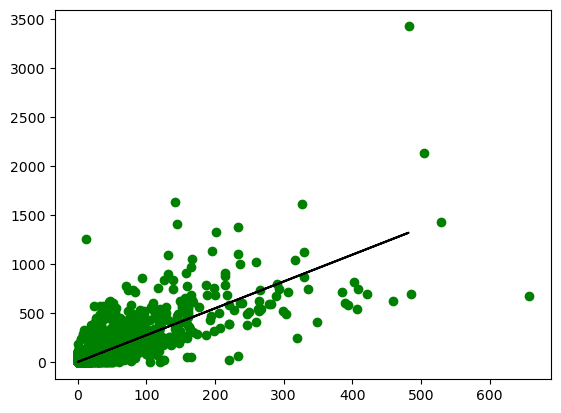

In [49]:
y_pred = reg.predict(X_test)

plt.scatter(X_train, y_train,color='g')

plt.plot(X_test, y_pred,color='k')


plt.show()


 intervalle de confiance = 5.462379628526173


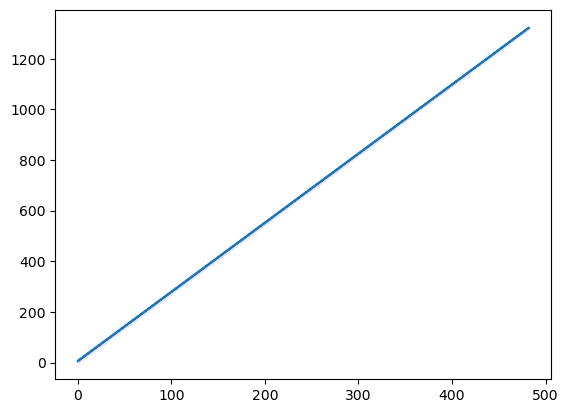

In [69]:
ci = 1.96 * np.std(y_pred)/np.sqrt(len(X_test.T[0]))

fig, ax = plt.subplots()
ax.plot(X_test.T[0],y_pred)
ax.fill_between(X_test.T[0], (y_pred-ci), (y_pred+ci), color='b', alpha=.1)
print(f"\n intervalle de confiance = {ci}")

In [70]:
#coef of determination

r_sq = reg.score(X,Y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.6722994311934094


# 2.5 Feature selection for multiple linear regression

### 1. Use Best Subset Selection method to select the best model for any possible number of features ranging from 1 to 6. Plot the curve R¯2 versus the number of features. Then, select the best model. That is, the model for which the adjusted coefficient of determination R¯2 is the highest.

In [17]:
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

In [20]:
#Importing tqdm for the progress bar
from tqdm.notebook import tnrange, tqdm_notebook

#Initialization variables
Y = data['num_shares']
X = data.iloc[:,3:11].drop(columns = 'num_shares', axis = 1)
k = 5
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 11 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

Loop...:   0%|          | 0/7 [00:00<?, ?it/s]

In [22]:
df_min = df[df.groupby('numb_features')['RSS'].transform(min) == df['RSS']]
df_max = df[df.groupby('numb_features')['R_squared'].transform(max) == df['R_squared']]
display(df_min.head(6))
display(df_max.head(6))

,numb_features,RSS,R_squared,features
3,1,3.999286e+07,0.672400,"(num_loves,)"
14,2,3.237161e+07,0.734830,"(num_comments, num_loves)"
48,3,3.217715e+07,0.736422,"(num_comments, num_loves, num_hahas)"
89,4,3.209358e+07,0.737107,"(num_comments, num_loves, num_wows, num_hahas)"
117,5,3.208796e+07,0.737153,"(num_comments, num_loves, num_wows, num_hahas,..."
119,6,3.208609e+07,0.737168,"(num_reactions, num_comments, num_likes, num_l..."


,numb_features,RSS,R_squared,features
3,1,3.999286e+07,0.672400,"(num_loves,)"
14,2,3.237161e+07,0.734830,"(num_comments, num_loves)"
48,3,3.217715e+07,0.736422,"(num_comments, num_loves, num_hahas)"
89,4,3.209358e+07,0.737107,"(num_comments, num_loves, num_wows, num_hahas)"
117,5,3.208796e+07,0.737153,"(num_comments, num_loves, num_wows, num_hahas,..."
119,6,3.208609e+07,0.737168,"(num_reactions, num_comments, num_likes, num_l..."


In [23]:
df['min_RSS'] = df.groupby('numb_features')['RSS'].transform(min)
df['max_R_squared'] = df.groupby('numb_features')['R_squared'].transform(max)
df.head()

,numb_features,RSS,R_squared,features,min_RSS,max_R_squared
0,1,1.144044e+08,0.062862,"(num_reactions,)",3.999286e+07,0.6724
1,1,7.197547e+07,0.410416,"(num_comments,)",3.999286e+07,0.6724
2,1,1.184462e+08,0.029753,"(num_likes,)",3.999286e+07,0.6724
3,1,3.999286e+07,0.672400,"(num_loves,)",3.999286e+07,0.6724
4,1,1.017939e+08,0.166160,"(num_wows,)",3.999286e+07,0.6724


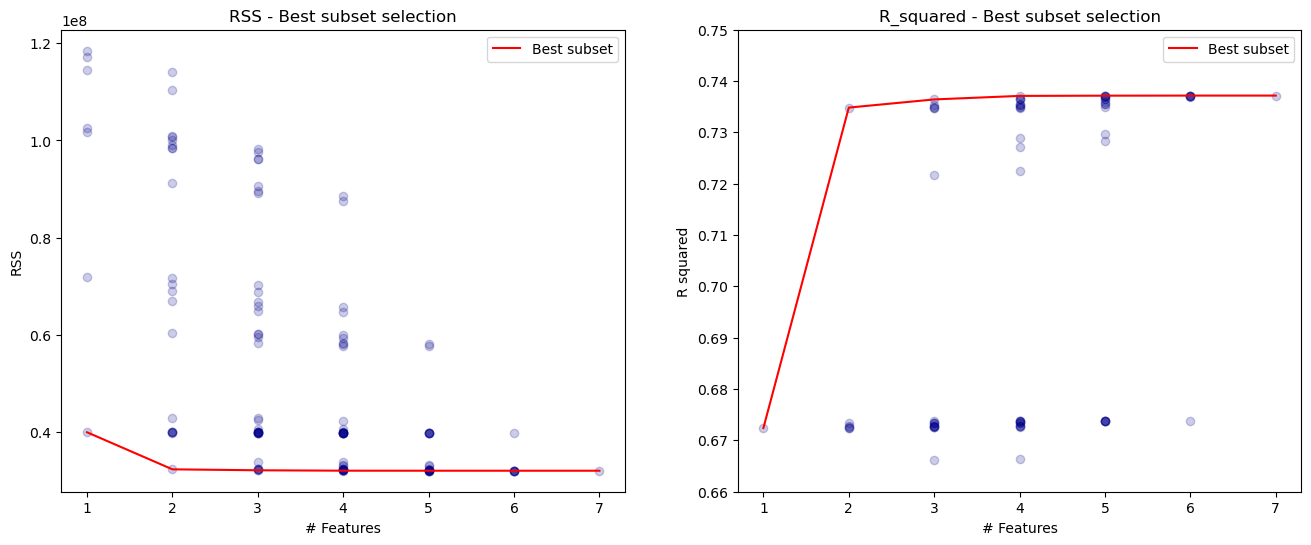

In [29]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(df.numb_features,df.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('RSS')
ax.set_title('RSS - Best subset selection')
ax.plot(df.numb_features,df.min_RSS,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.set_ylim([0.66, 0.75])
ax.scatter(df.numb_features,df.R_squared, alpha = .2, color = 'darkblue' )
ax.plot(df.numb_features,df.max_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('R squared')
ax.set_title('R_squared - Best subset selection')
ax.legend()

plt.show()

### 2. How many features did you keep ? Which ones ?

Nous avons gardé 4 variables, car on remarque sur le graphique de R2 on remarque que le coude est plus prononcé au niveau de la quatrième variable, après celle-ci les valeurs de R2 ne fluctuent presque plus. les valeurs sont les suivantes (num_comments, num_loves, num_wows, num_hahas)

### 3. Why is it more appropriate to use the adjusted coefficient of determination R¯2 instead of the coefficient of determination R2 when comparing two models with different numbers of predictors ?



Le coefficient de détermination R^2 mesure la proportion de variation de la variable cible qui est expliquée par les prédicteurs dans un modèle de régression linéaire. Il varie de 0 à 1, où une valeur plus élevée indique un meilleur ajustement du modèle aux données.Cependant, lorsque l'on compare deux modèles avec un nombre différent de prédicteurs, la valeur de R^2 augmentera toujours à mesure que le nombre de prédicteurs augmente, indépendamment du fait que les prédicteurs supplémentaires soient réellement informatifs ou non. Cela est connu sous le nom de problème de surapprentissage.Le coefficient de détermination ajusté R^2, quant à lui, prend en compte le nombre de prédicteurs dans le modèle et corrige le problème de surapprentissage. Il varie de 0 à 1, où une valeur plus élevée indique un meilleur ajustement du modèle aux données, ajusté en fonction du nombre de prédicteurs.

Le R^2 ajusté est plus approprié lorsque l'on compare des modèles avec un nombre différent de prédicteurs car il corrige le problème de surapprentissage. Il donne donc une estimation plus réaliste et précise de la performance du modèle pour prédire la variable cible.



### 4.  For the selected model, what are the values of the coefficient estimates ? Interpret them. What is the value of the coefficient of determination R2 ? Interpret this value.

In [38]:
X2 = data[["num_comments", "num_loves", "num_wows", "num_hahas"]]

clf = linear_model.LinearRegression()
clf.fit(X2,Y)

LinearRegression()

In [41]:
print(f"determination coef: {clf.score(X2,Y)}")

print(f"slope: {clf.coef_}")

determination coef: 0.7371069231553026
slope: [ 0.04453951  2.2118306   0.46386897 -1.59848416]


In [43]:
clf.intercept_

2.391398158704888

Les coefficients correspondent à la pente de chaque variable sur chacun de leurs axes, le coef de determination mesure la qualité de la regression linéaire.

### 5. For the selected model, perform the zero slope hypothesis test for all the coefficients except β0 and conclude.